# 2.5: Visual Weather Systems CNN

Objective: Train a Convolutional Neural Network (CNN) for classifying weather-related images into different categories.

### This script contains the following:

## 1. [Import Libraries](#import_libraries)

## 2. [Loading and Pre-processing Weather Images](#preprocess)

## 3. [Compiling and Runnning](#compile)

## 1. Importing Libraries and Data <a id='import_libraries'></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical  # Adjusted import
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Adjusted import
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Loading and Pre-processing Weather Images <a id='preprocess'></a>

In [11]:
#download the weather images and put them in a directory
path = r'/content/drive/MyDrive/Careerfoundary/Machine_learning/012 Data/Original_Data/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Sunrise', 'Shine', 'Rain', 'Cloudy']


In [12]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 885 images belonging to 4 classes.
Found 220 images belonging to 4 classes.


In [13]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

# 3. Compiling and Runnning <a id='compile'></a>

In [22]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator,
    epochs = 45, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/45
27/27 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.8347 - loss: 0.0616 - val_accuracy: 0.8750 - val_loss: 0.0511
Epoch 2/45
 1/27 ━━━━━━━━━━━━━━━━━━━━ 1:19 3s/step - accuracy: 0.9062 - loss: 0.0366

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 602ms/step - accuracy: 0.9062 - loss: 0.0366 - val_accuracy: 0.8177 - val_loss: 0.0660
Epoch 3/45
27/27 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.8414 - loss: 0.0558 - val_accuracy: 0.7500 - val_loss: 0.1161
Epoch 4/45
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 602ms/step - accuracy: 0.9062 - loss: 0.0393 - val_accuracy: 0.7604 - val_loss: 0.1053
Epoch 5/45
27/27 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.8610 - loss: 0.0568 - val_accuracy: 0.8542 - val_loss: 0.0583
Epoch 6/45
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 609ms/step - accuracy: 0.9062 - loss: 0.0406 - val_accuracy: 0.8646 - val_loss: 0.0612
Epoch 7/45
27/27 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.8557 - loss: 0.0556 - val_accuracy: 0.8802 - val_loss: 0.0466
Epoch 8/45
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 629ms/step - accuracy: 0.9062 - loss: 0.0302 - val_accuracy: 0.8698 - val_loss: 0.0573
Epoch 9/45
27/27 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.8878 - loss: 0.0417 - val_accuracy: 0.9062 - val_

In [23]:
results = pd.DataFrame(model.history.history)

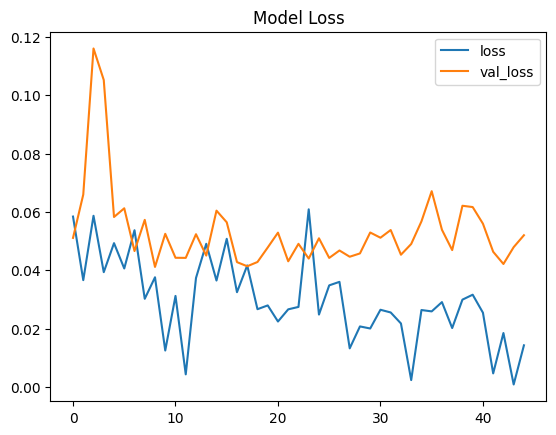

In [24]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

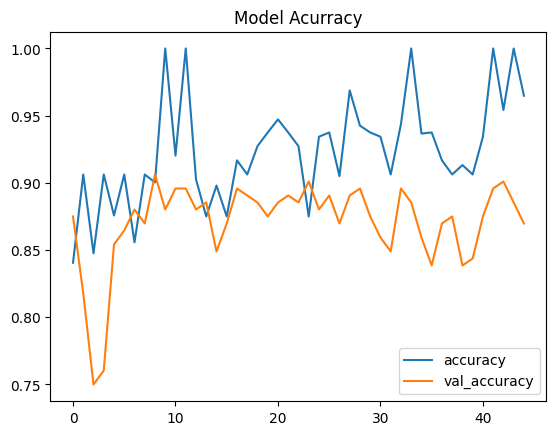

In [25]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [26]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9648300409317017, Val_Accuracy: 0.8697916865348816
Loss: 0.01423679944127798, Val_Loss: 0.052008528262376785


11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step


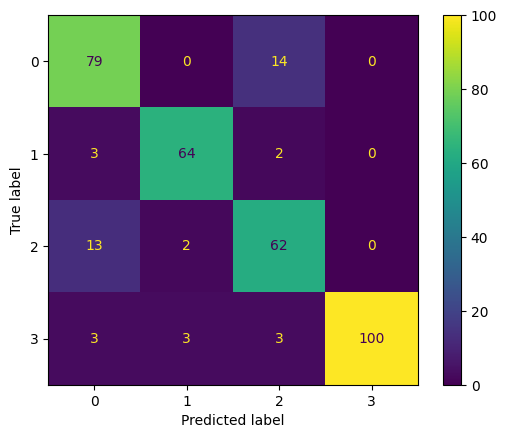

In [27]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [28]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


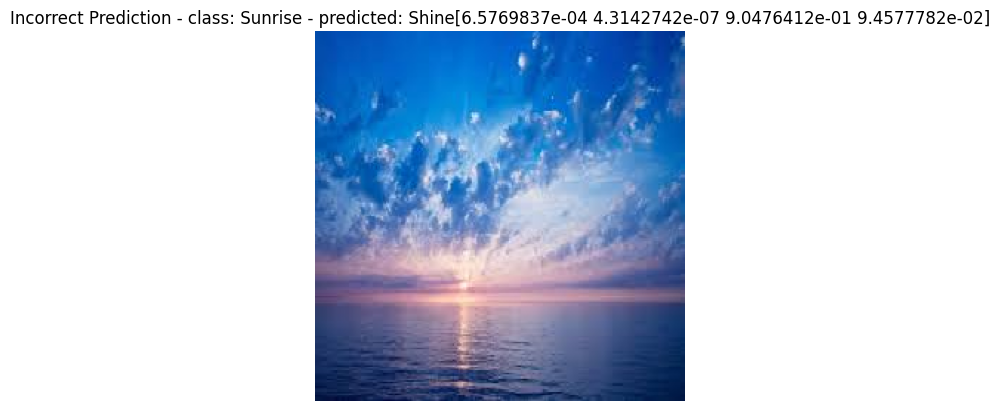

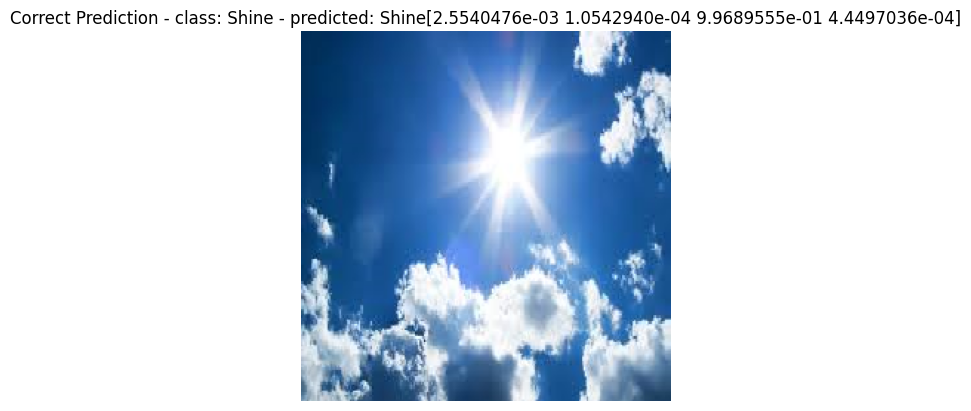

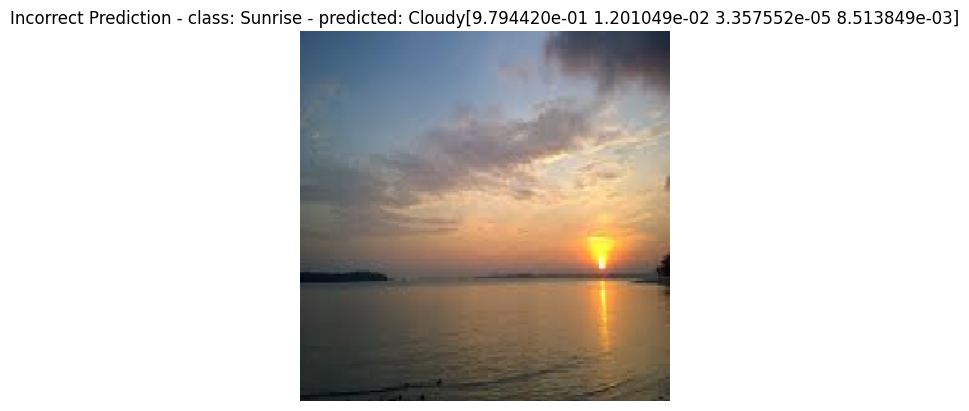

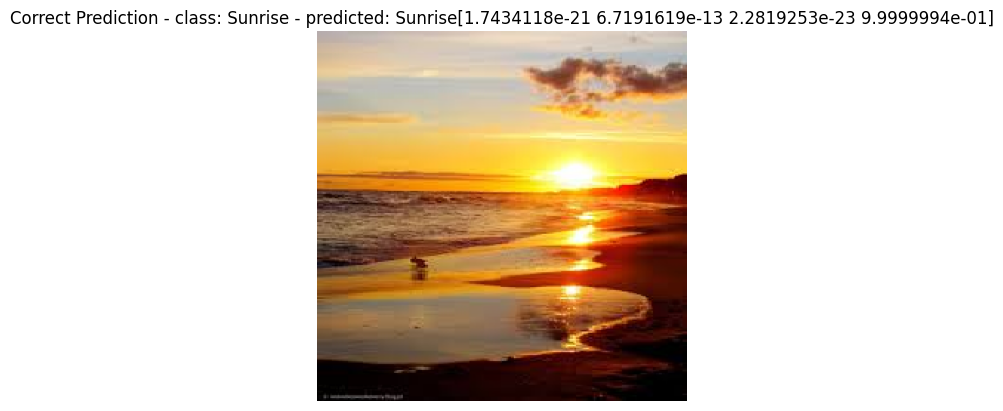

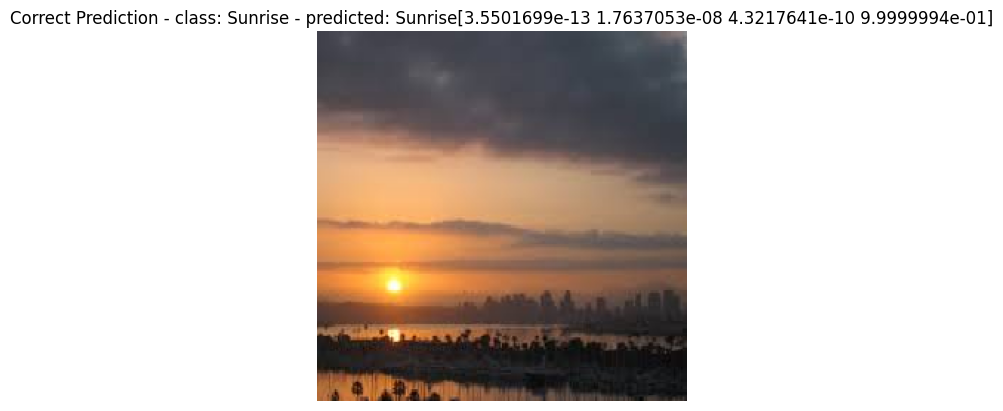

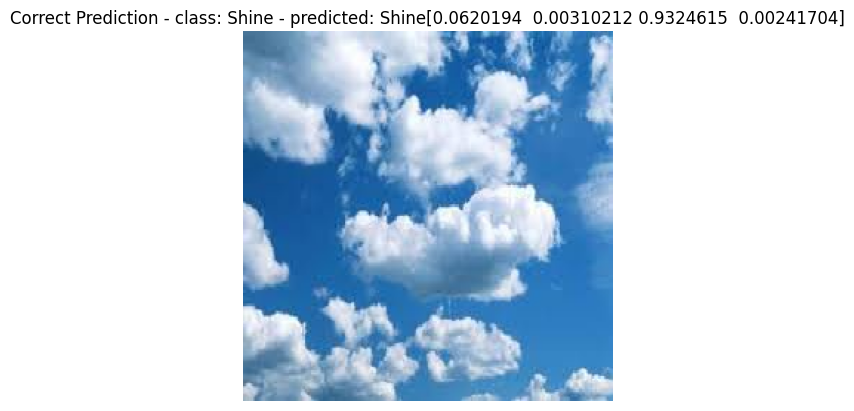

In [29]:
predict_one(model, 6) #<--you can show multiple pictures with this command. Just fill in the number you want to see.